# Project Prototype 

In [125]:
import pandas as pd
Mortality = pd.read_csv("Mortality Both Sexes.csv")
MortalityF = pd.read_csv("Mortality Female.csv")
MortalityM = pd.read_csv("Mortality Male.csv")
Alcohol = pd.read_csv("WHOAlcoholTotalPerCapita_2021-09-20v2.csv")

#new things
Mortality = Mortality[Mortality['Period']>=2000]
Mortality = Mortality[Mortality['Period']<=2016]
Mortality = Mortality.drop(columns = 'DateModified', axis= '1')


Alcohol = Alcohol[Alcohol['Year']>=2000]
Alcohol = Alcohol[Alcohol['Year']<=2016]
Alcohol = Alcohol.drop(columns = {'WHO Region Code',
                                  'Country Code','Alcohol total per capita (15+) consumption in liters (string)'},
                       axis= '1')

In [126]:
Mortality.head()

,Unnamed: 0,ParentLocation,Location,Period,Sex,Adult mortality rate
0,0,Americas,Barbados,2016,Both sexes,100.4
1,1,Europe,Serbia,2016,Both sexes,102.5
2,2,Europe,Turkey,2016,Both sexes,104.0
3,3,Europe,Slovakia,2016,Both sexes,104.1
4,4,Western Pacific,Samoa,2016,Both sexes,110.4


In [127]:
Alcohol.head()

,WHO Region,Country,Year,Sex,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation)
1692,Eastern Mediterranean,Kuwait,2016,Both sexes,0.0,0.0,0.0
1693,Eastern Mediterranean,Kuwait,2016,Female,0.0,0.0,0.0
1694,Eastern Mediterranean,Kuwait,2016,Male,0.0,0.0,0.0
1695,Africa,Mauritania,2016,Both sexes,0.0,0.0,0.0
1696,Africa,Mauritania,2016,Female,0.0,0.0,0.0


In [147]:
#more cleanup!!!!
import seaborn as sns


Mortality = Mortality[Mortality['Location']!= 'South Sudan']
Mortality = Mortality[Mortality['Location']!= 'Sudan']

Alcohol = Alcohol[Alcohol['Country']!='Cook Islands']
Alcohol = Alcohol[Alcohol['Country']!='Dominica']
Alcohol = Alcohol[Alcohol['Country']!='Nauru']
Alcohol = Alcohol[Alcohol['Country']!='Niue']
Alcohol = Alcohol[Alcohol['Country']!='Saint Kitts and Nevis']
Alcohol = Alcohol[Alcohol['Country']!='Surinam']
Alcohol = Alcohol[Alcohol['Country']!='Tuvalu']
Alcohol = Alcohol[Alcohol['Country']!='Andorra']

### Question 1


### Question 2

In [138]:
byLocMort = Mortality.groupby('Location').mean()
byLocMort = byLocMort.rename_axis('Location').reset_index()

byLocMortLowest = byLocMort.sort_values('Adult mortality rate')
byLocMortHighest = byLocMort.sort_values('Adult mortality rate',ascending = False)
#print(byLocMort)

byLocAlc = Alcohol.groupby('Country').mean()
byLocAlc = byLocAlc.rename_axis('Country').reset_index()


byLocAlc['alc'] = byLocAlc['Alcohol total per capita (15+) consumption in liters (numeric)']
#print(byLocAlc)
byLocAlcLowest = byLocAlc.sort_values('alc')
byLocAlcHighest = byLocAlc.sort_values('alc',ascending = False)

In [130]:
byLocMortLowest.head()

,Location,Unnamed: 0,Period,Adult mortality rate
74,Iceland,1608.529412,2008.0,59.274118
155,Switzerland,1610.000000,2008.0,61.354706
103,Malta,1610.176471,2008.0,61.419412
154,Sweden,1611.000000,2008.0,62.229412
81,Italy,1610.647059,2008.0,62.236471


In [131]:
byLocMortHighest.head()

,Location,Unnamed: 0,Period,Adult mortality rate
180,Zimbabwe,1606.529412,2008.0,549.347059
93,Lesotho,1604.882353,2008.0,536.264706
55,Eswatini,1605.176471,2008.0,528.958824
31,Central African Republic,1603.117647,2008.0,491.682353
144,Sierra Leone,1600.647059,2008.0,452.135294


In [132]:
byLocAlcLowest.head()

,Country,Year,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation),alc
140,Saudi Arabia,2008.0,0.000000,0.000000,0.000000,0.000000
149,Somalia,2008.0,0.000000,0.000000,0.000000,0.000000
104,Mauritania,2008.0,0.000000,0.000000,0.000000,0.000000
88,Kuwait,2008.0,0.000000,0.000000,0.000000,0.000000
12,Bangladesh,2008.0,0.001882,0.000016,0.009706,0.001882


In [133]:
byLocAlcHighest.head()

,Country,Year,Alcohol total per capita (15+) consumption in liters (numeric),Alcohol total per capita (15+) consumption in liters (low estimation),Alcohol total per capita (15+) consumption in liters (high estimation),alc
96,Lithuania,2008.0,16.292941,14.421569,19.124314,16.292941
134,Russian Federation,2008.0,15.963137,13.728431,18.804510,15.963137
133,Romania,2008.0,15.598235,13.470196,18.063333,15.598235
167,Uganda,2008.0,14.816471,12.284118,17.577255,14.816471
42,Czechia,2008.0,14.687451,12.646863,16.963725,14.687451


In [137]:
print(byLocMort.shape)
print(byLocAlc.shape)

(181, 4)
(181, 6)


In [ ]:
#For cleanup, no longer needed

'''
countryMort = byLocMort.sort_values('Location')
countryAlc = byLocAlc.sort_values('Country')

countryMort = list(countryMort['Location'])
countryAlc = list(countryAlc['Country'])

y = 'Angola'
print(y)
if y in countryAlc:
    print('is in countryAlc and countryMort')
else:
    print('isnt in countryAlc, needs to be removed from countryMort')
    
x = 'Andorra'
if x in countryMort:
    print(x)
    print(' is in countryMort and countryAlc')
else:
    print(x)
    print('isnt in CountryMort, needs to be removed from countryAlc')
    
print('START LOOP')

#print(countryMort)
for i in range(0, 181):
    first = countryMort[i]
    second = countryAlc[i]
    if first != second:
        print(len(countryMort))
        print(first)
        print(len(countryAlc))
        print(second)
        break
        '''

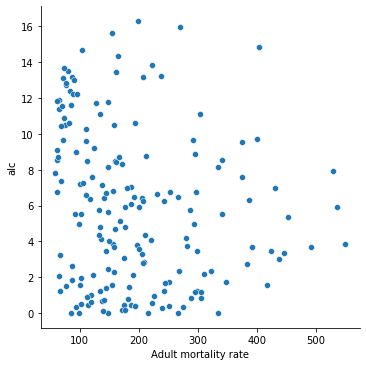

In [150]:
current = pd.DataFrame()
my2008Mort = byLocMort[byLocMort['Period']==2008]
my2008Alc = byLocAlc[byLocAlc['Year']== 2008]

#merge2008 = pd.merge(my2008Mort,my2008Alc, left_on = ['Location'],right_on = ['Country'])
#print(merge2008)

#for myYear in range(2008, 2017):
 #   tempAlc = 

#merge byLocMort and byLocAlc
#plot Alcohol Consumption Numeric against Adult Mortality Rate in a line plot, colored by Country
merged = pd.merge(byLocMort,byLocAlc, left_on = ['Location','Period'],right_on = ['Country', 'Year'])

sns.relplot(data = merged, x='Adult mortality rate', y='alc',kind='scatter')#hue = 'Country'


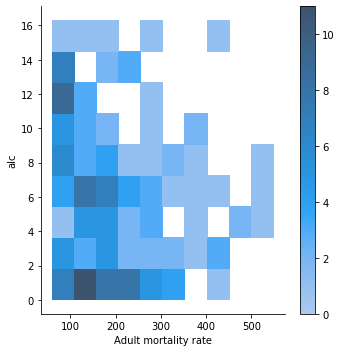

In [149]:
sns.displot(data=merged, x="Adult mortality rate", y="alc", cbar=True)

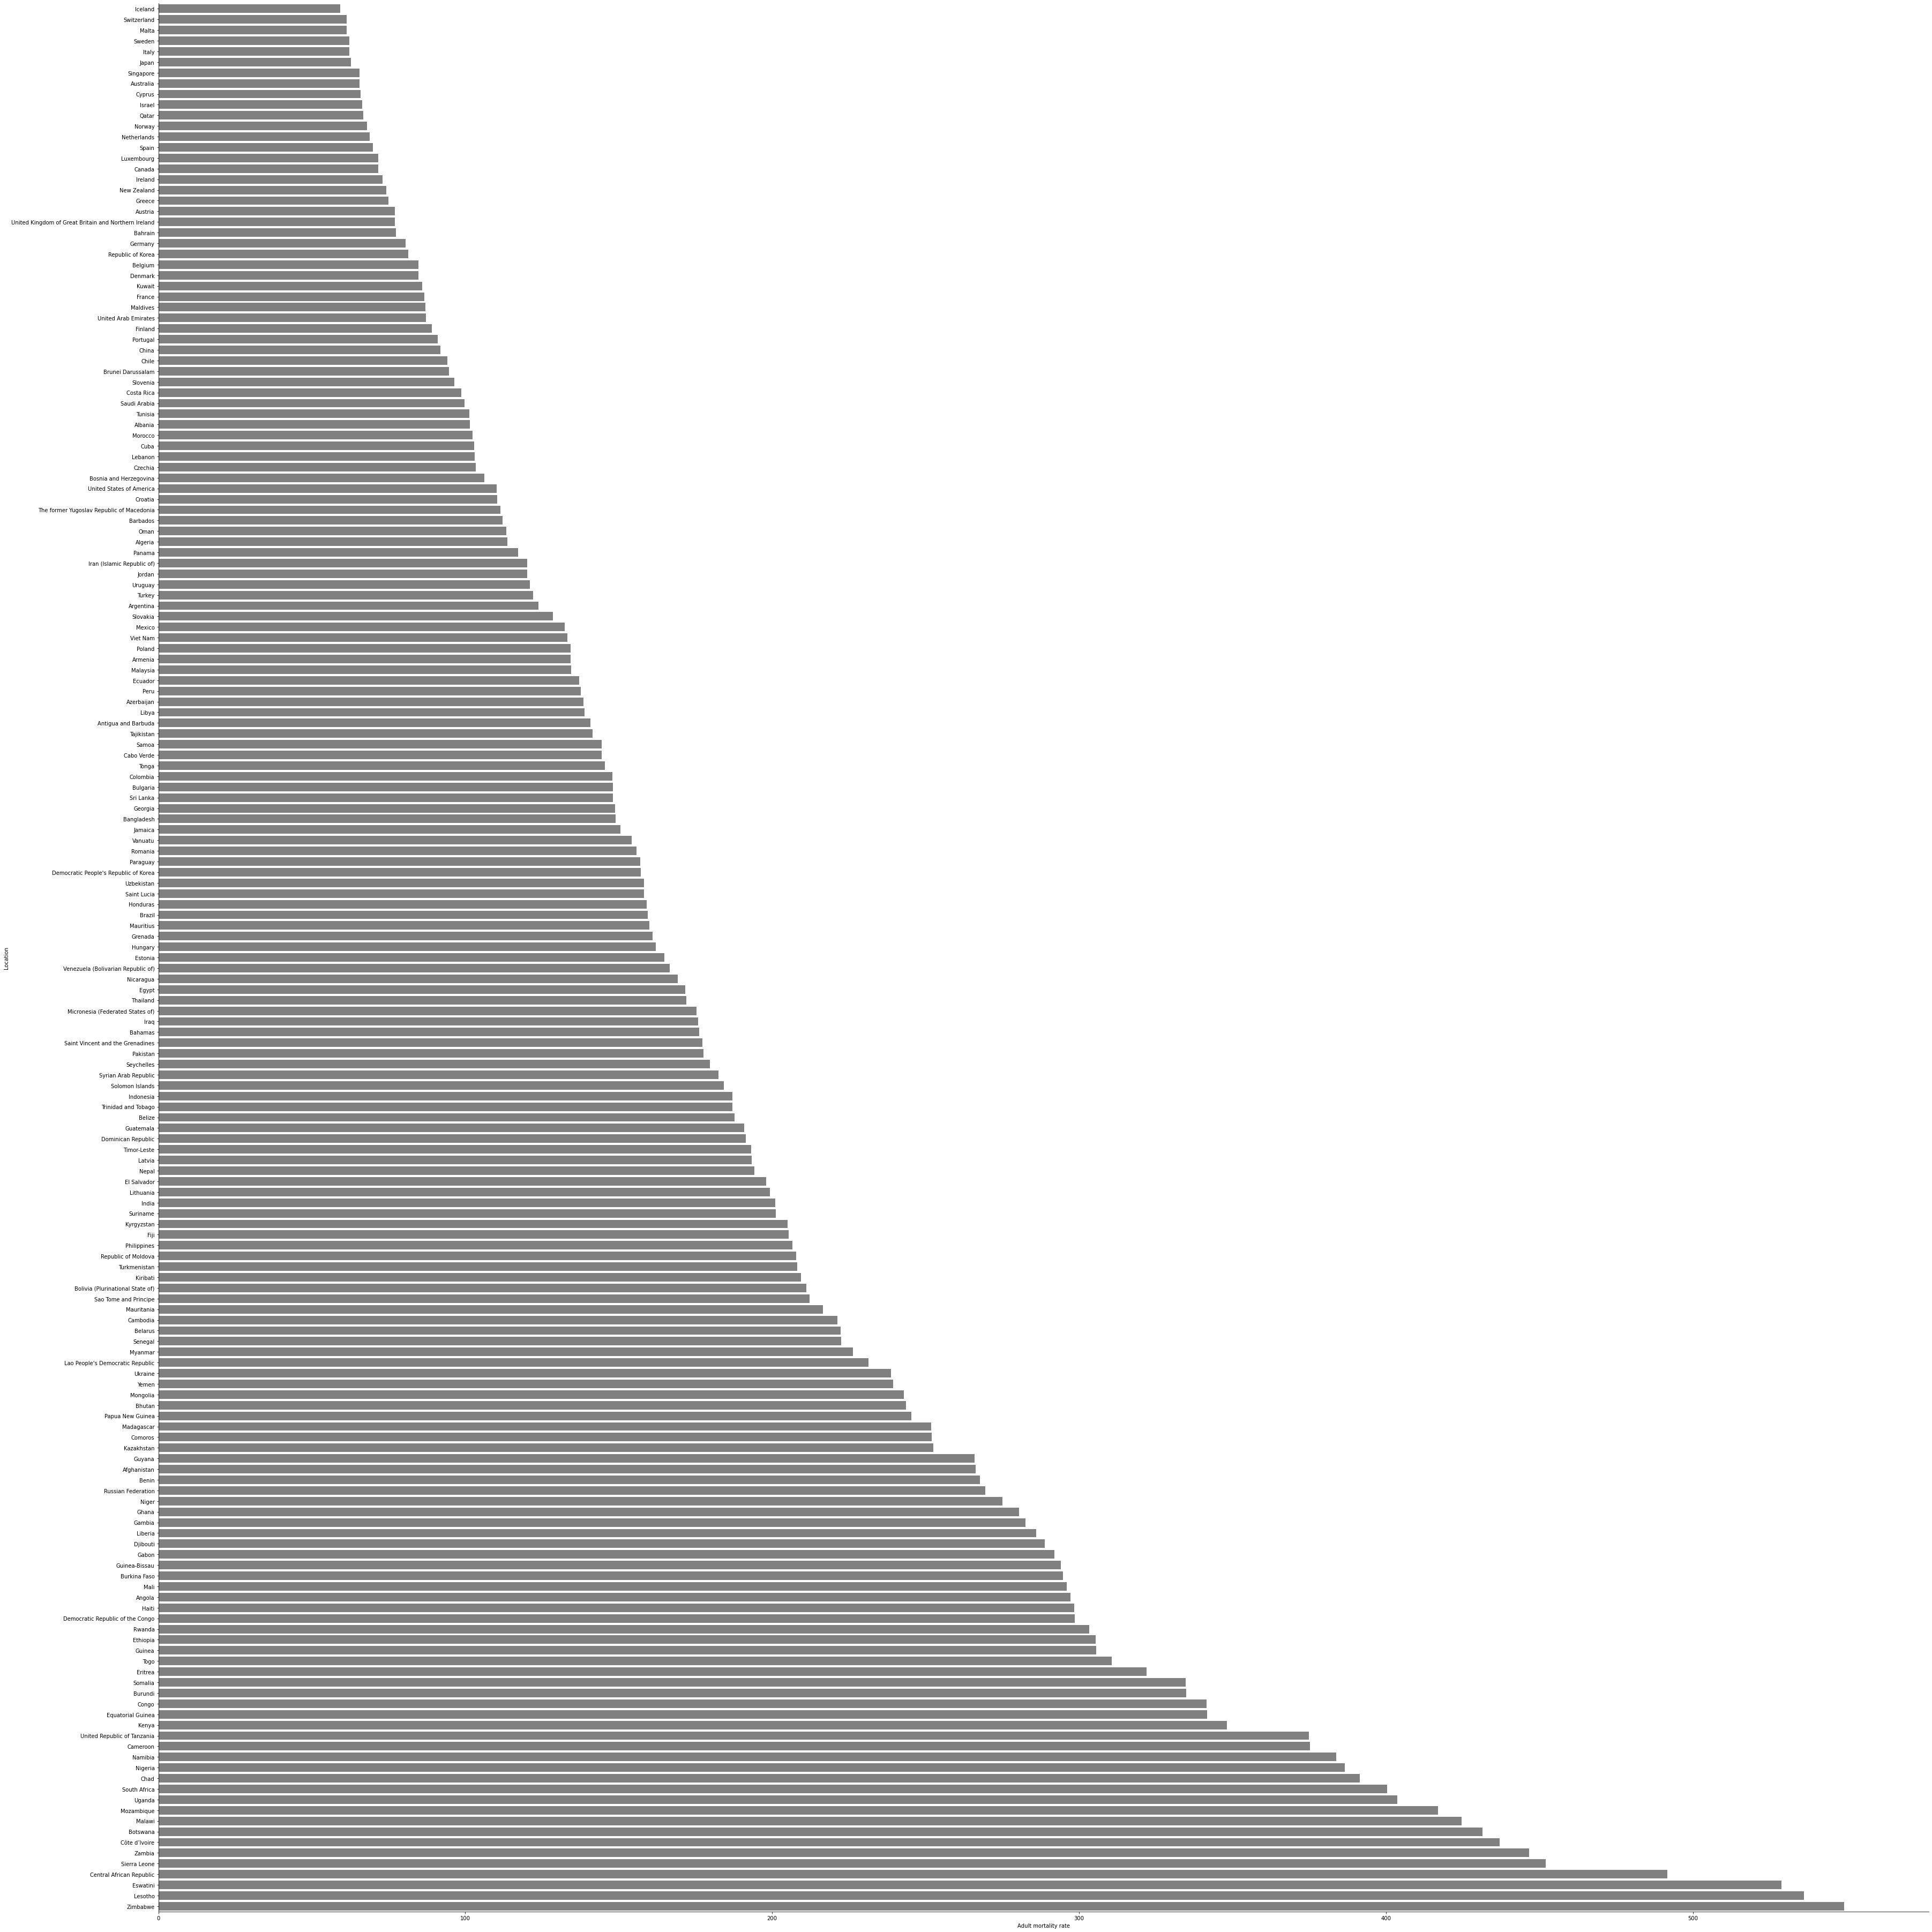

In [154]:
sortMort = merged.sort_values('Adult mortality rate')
sns.catplot(y="Location", x="Adult mortality rate", data=sortMort, kind='bar', color='gray', height = 50)


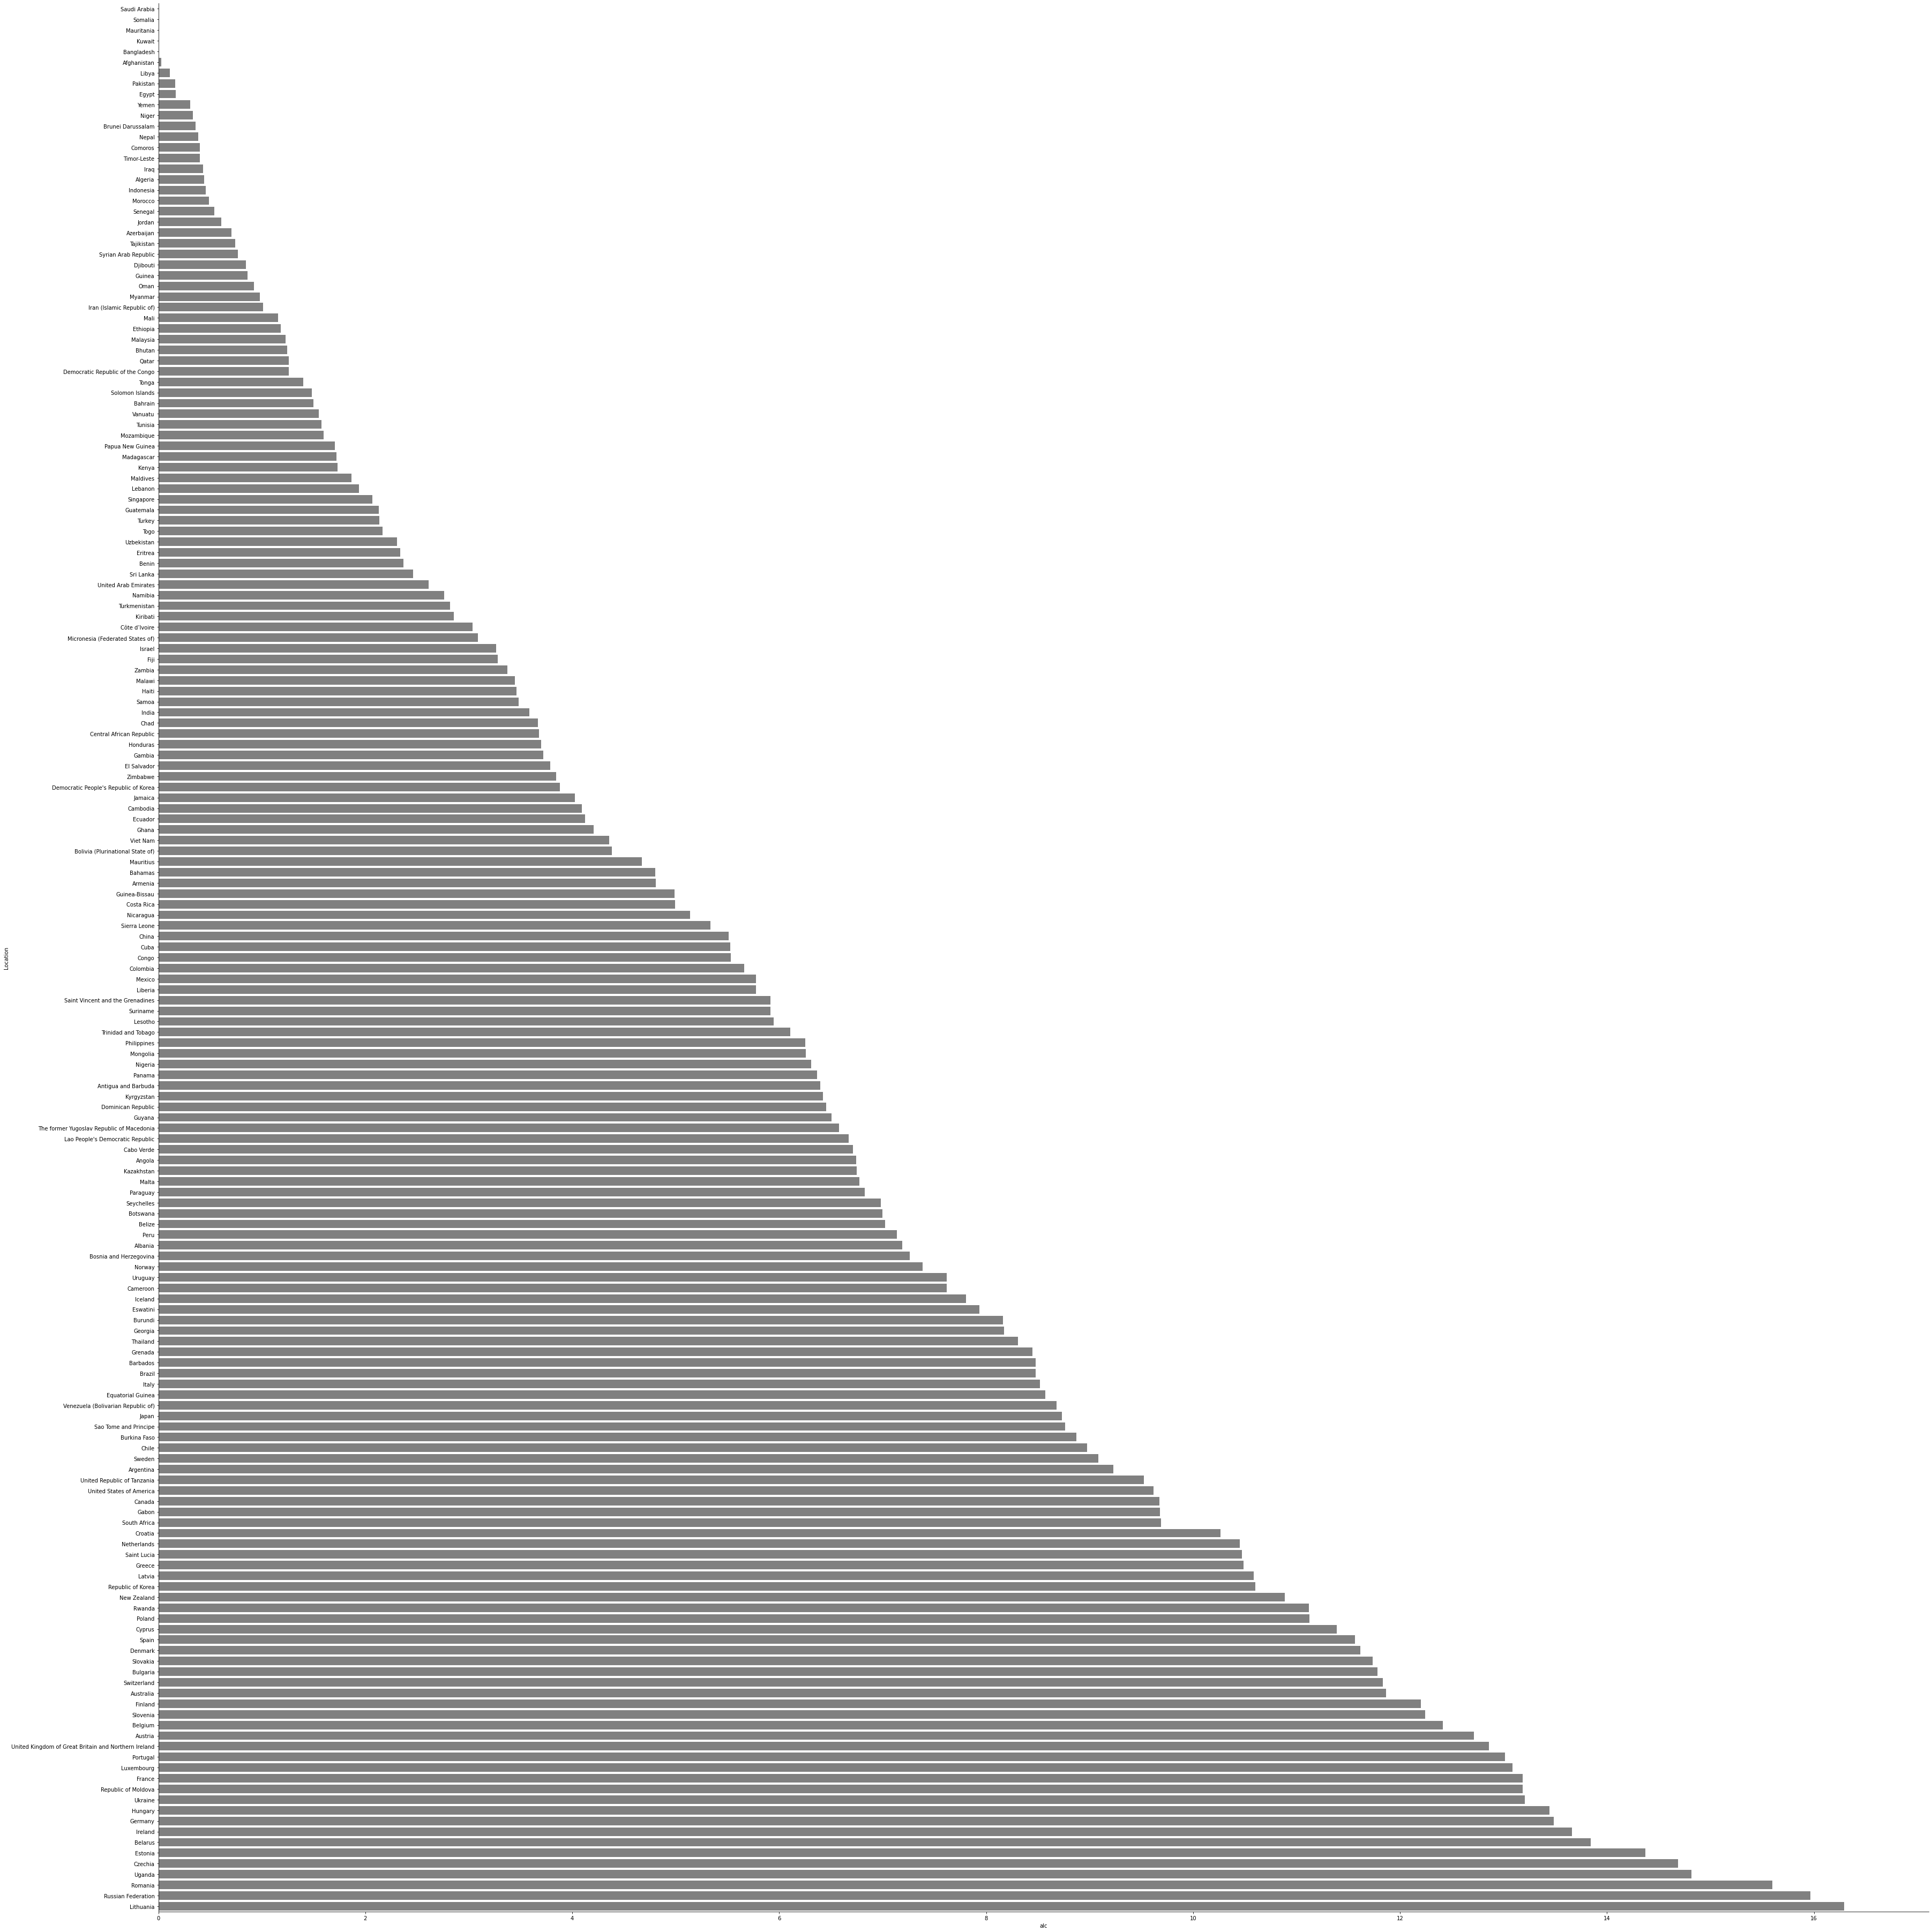

In [156]:
sortAlc = merged.sort_values('alc')
sns.catplot(y="Location", x="alc", data=sortAlc, kind='bar', color='gray', height = 50)

### Question 3


### Question 4